# Exercise 1 

You are working with a dataset containing sales information (shown below), but the data has several inconsistencies and formatting issues. Your task is to clean the data using Python, focusing on applying proper formatting, while following good coding practices (such as readable variable names, comments, consistent indentation, and use of functions). You will fix issues related to missing values, incorrect data types, string inconsistencies, and extra whitespaces.

| Customer ID | Name | Age | Gender | Purchase Amount | Purchase Date | Payment Method | Location |
| -------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- |
| 1 | John Doe | 45 | Male | 2500.50 | 2023-01-15 | Creditcard | New York |
| 2 | jennifer Smith | 34 | female | 180.75 | 2022/05/12 | Bank Transfer | San Francisco |
| 3 | Ron Miller | NaN | Male | 500.0 | 2023/03/14 | PayPal | NewYork |
| 4 | Mary Johnson | 29 | Female | -120.00 | 2023-07-30 | Credit Card | Los Angeles |
| 5 | Tim Lewis | 41 | male | 75.0 | 2023-02-15 | cash | San Francisco |

### Exercise 1(a) (2 points)

Load `pandas` and `numpy`.

In [9]:
import pandas as pd
import numpy as np

### Exercise 1(b) (3 points)

Create a data frame called `df` with the below data dictionary.

```
data = {
    'Customer ID': [1, 2, 3, 4, 5],
    'Name': ['John Doe', 'jennifer Smith', 'Ron Miller', 'Mary Johnson', 'Tim Lewis'],
    'Age': [45, 34, np.nan, 29, 41],
    'Gender': ['Male', 'female', 'Male', 'Female', 'male'],
    'Purchase Amount': [2500.50, 180.75, 500.0, -120.00, 75.0],
    'Purchase Date': ['2023-01-15', '2022/05/12', '2023/03/14', '2023-07-30', '2023-02-15'],
    'Payment Method': ['Creditcard', 'Bank Transfer', 'PayPal', 'Credit Card', 'cash'],
    'Location': ['New York', 'San Francisco', 'NewYork', 'Los Angeles', 'San Francisco']
}
```

In [2]:
data = {
    'Customer ID': [1, 2, 3, 4, 5],
    'Name': ['John Doe', 'jennifer Smith', 'Ron Miller', 'Mary Johnson', 'Tim Lewis'],
    'Age': [45, 34, np.nan, 29, 41],
    'Gender': ['Male', 'female', 'Male', 'Female', 'male'],
    'Purchase Amount': [2500.50, 180.75, 500.0, -120.00, 75.0],
    'Purchase Date': ['2023-01-15', '2022/05/12', '2023/03/14', '2023-07-30', '2023-02-15'],
    'Payment Method': ['Creditcard', 'Bank Transfer', 'PayPal', 'Credit Card', 'cash'],
    'Location': ['New York', 'San Francisco', 'NewYork', 'Los Angeles', 'San Francisco']
}

df = pd.DataFrame(data)
df

,Customer ID,Name,Age,Gender,Purchase Amount,Purchase Date,Payment Method,Location
0,1,John Doe,45.0,Male,2500.50,2023-01-15,Creditcard,New York
1,2,jennifer Smith,34.0,female,180.75,2022/05/12,Bank Transfer,San Francisco
2,3,Ron Miller,NaN,Male,500.00,2023/03/14,PayPal,NewYork
3,4,Mary Johnson,29.0,Female,-120.00,2023-07-30,Credit Card,Los Angeles
4,5,Tim Lewis,41.0,male,75.00,2023-02-15,cash,San Francisco


### Exercise 1(c) (15 points)

Create a function that perfoms the below cleaning steps. Ensure that your code is well-formatted and uses good practices like function definitions, variable names, and comments.

- Standardize the `Gender` column:
    - Ensure that all values in the `Gender` column are either `Male` or `Female` (proper case).

- Handle missing values in the `Age` column:
    - Fill the missing values in the `Age` column with the average age of all customers.

- Fix formatting issues in the `Purchase Date` column:
    - Ensure all dates are in the format `YYYY-MM-DD`.

- Correct invalid values in the `Purchase Amount` column:
    - Replace any negative purchase amounts with their absolute values.

- Fix the `Payment Method` column:
    - Standardize the payment methods (`Creditcard`, `Credit Card` -> `Credit Card`).

- Remove extra spaces and correct inconsistent locations:
    - Remove any extra spaces in the `Location` column and ensure consistent formatting (e.g., `NewYork` -> `New York`).

- Write a function:
    - Create a function that performs all of the above cleaning steps in a single process and returns the cleaned DataFrame.

The expected output of the function should be:

| Customer ID | Name | Age | Gender | Purchase Amount | Purchase Date | Payment Method | Location |
| -------- | ------- | ------- | ------- | ------- | ------- | ------- | ------- |
| 1 | John Doe | 45 | Male | 2500.50 | 2023-01-15 | Credit Card | New York |
| 2 | jennifer Smith | 34 | Female | 180.75 | 2022-05-12 | Bank Transfer | San Francisco |
| 3 | Ron Miller | 37.25 | Male | 500.0 | 2023-03-14 | PayPal | New York |
| 4 | Mary Johnson | 29 | Female | 120.00 | 2023-07-30 | Credit Card | Los Angeles |
| 5 | Tim Lewis | 41 | Male | 75.0 | 2023-02-15 | Cash | San Francisco |

In [25]:
def clean_df(df):
    df['Gender'] = df['Gender'].str.capitalize()
    df['Age'] = df['Age'].fillna(np.mean(df['Age']))
    df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format="mixed")
    df['Purchase Amount'] = df['Purchase Amount'].abs()
    df['Payment Method'] = df['Payment Method'].str.title().str.replace('Creditcard', 'Credit Card')
    df['Location'] = df['Location'].str.replace(' ','').str.replace(r'(?<!^)(?=[A-Z])', ' ', regex=True)
    return df

clean_df(df)


,Customer ID,Name,Age,Gender,Purchase Amount,Purchase Date,Payment Method,Location
0,1,John Doe,45.00,Male,2500.50,2023-01-15,Credit Card,New York
1,2,jennifer Smith,34.00,Female,180.75,2022-05-12,Bank Transfer,San Francisco
2,3,Ron Miller,37.25,Male,500.00,2023-03-14,Paypal,New York
3,4,Mary Johnson,29.00,Female,120.00,2023-07-30,Credit Card,Los Angeles
4,5,Tim Lewis,41.00,Male,75.00,2023-02-15,Cash,San Francisco


# Exercise 2 

In this exercise, we will explore the `shopping_trends.csv` data file. The Customer Shopping Preferences Dataset offers valuable insights into consumer behavior and purchasing patterns. Understanding customer preferences and trends is critical for businesses to tailor their products, marketing strategies, and overall customer experience. This dataset captures a wide range of customer attributes including age, gender, purchase history, preferred payment methods, frequency of purchases, and more. Analyzing this data can help businesses make informed decisions, optimize product offerings, and enhance customer satisfaction. The dataset stands as a valuable resource for businesses aiming to align their strategies with customer needs and preferences. A brief description of each of the columns in the data set is presented below.


- `Customer ID`: Unique identifier for each customer
- `Age`: Age of the customer
- `Gender`: Gender of the customer (Male/Female)
- `Item Purchased`: The item purchased by the customer
- `Category`: Category of the item purchased
- `Purchase Amount (USD)`: The amount of the purchase in USD
- `Location`: Location where the purchase was made
- `Size`: Size of the purchased item
- `Color`: Color of the purchased item
- `Season`: Season during which the purchase was made
- `Review Rating`: Rating given by the customer for the purchased item
- `Subscription Status`: Indicates if the customer has a subscription (Yes/No)
- `Shipping Type`: Type of shipping chosen by the customer
- `Discount Applied`: Indicates if a discount was applied to the purchase (Yes/No)
- `Promo Code Used`: Indicates if a promo code was used for the purchase (Yes/No)
- `Previous Purchases`: The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
- `Payment Method`: Customer's most preferred payment method
- `Frequency of Purchases`: Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

### Exercise 2(a) (2 points)

Load `pandas`, `matplotlib`, and `seaborn`


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 2(b) (2 points)

Read the `shopping_trends.csv` data file and create a data frame called `df`.

In [27]:
df = pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### Exercise 2(c) (2 points)

Drop the `Customer ID` column.

In [30]:
df = df.drop(columns='Customer ID')
df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### Exercise 2(d) (4 points)

Visualize the distribution of `Age`. Describe the chart.

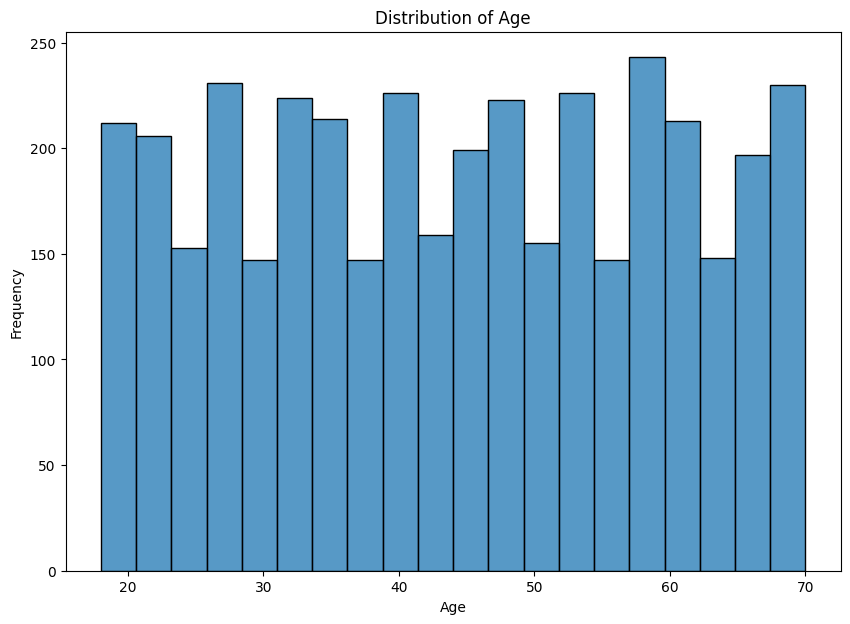

In [44]:
fig, ax = plt.subplots(figsize = (10,7))

sns.histplot(df['Age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

From the above chart we can see an equal distribution of ages from 20-70

### Exercise 2(e) (2 points)

What is the most popular product category?

In [48]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

### Exercise 2(f) (3 points)

What is the average purchase amount for each product category?

In [50]:
df['Purchase Amount (USD)'].groupby(df['Category']).mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

### Exercise 2(g) (3 points)

What is the percentage of customers who have applied discounts on their purchases?

In [65]:
print((df[df['Discount Applied'] == 'Yes'].shape[0]/df.shape[0])*100,'%')

43.0 %


### Exercise 2(h) (6 points)

How does purchase amount vary across different payment methods? Create an appropriate chart that can help to answer this question.

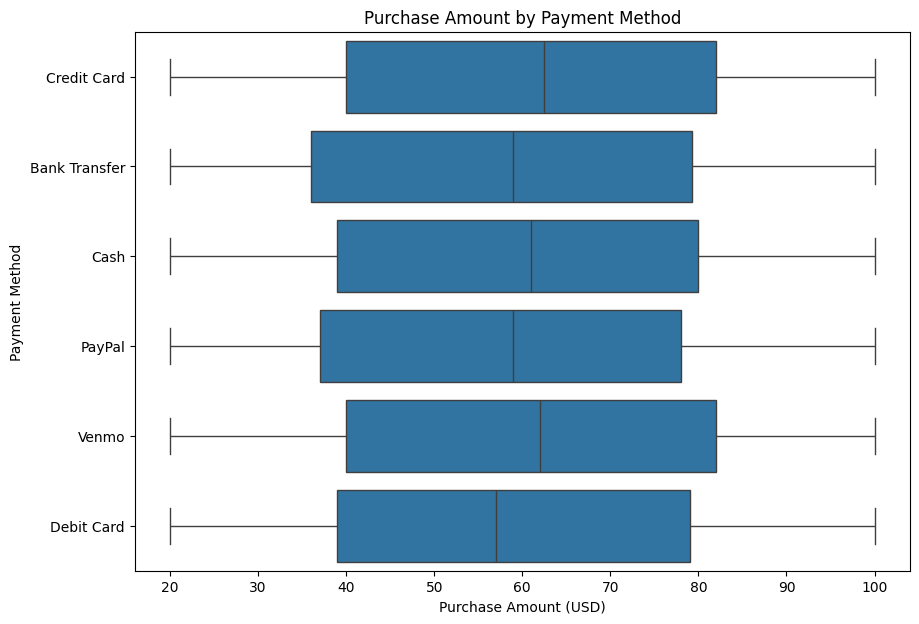

In [71]:
fig, ax = plt.subplots(figsize = (10,7))

sns.boxplot(x=df['Purchase Amount (USD)'], y=df['Payment Method'])
plt.title('Purchase Amount by Payment Method')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Payment Method')
plt.show()

From the above chart we can see credit card and venmo payments have the highest mean purchase amount and debit card has the lowest

### Exercise 2(i) (3 points)

What is the average number of previous purchases per customer?

In [73]:
df['Previous Purchases'].mean()

25.35153846153846

### Exercise 2(j) (5 points)

Is there a relationship between `Purchase Amount (USD)` and `Review Rating`? Create the appropriate chart to answer this question.

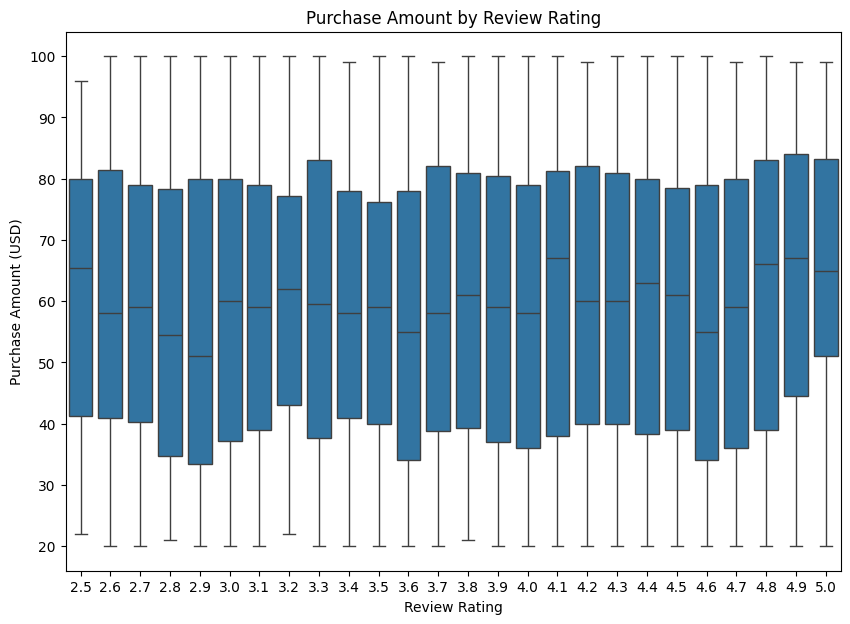

In [79]:
fig, ax = plt.subplots(figsize = (10,7))

sns.boxplot(x=df['Review Rating'], y=df['Purchase Amount (USD)'])
plt.title('Purchase Amount by Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')
plt.show()

From the above chart, it doesn't look like there is much of a correlation. The rating of 5 has the has the highest and tightest 1-4th quartile range but the means are all over the place showing no real trend

### Exercise 2(k) (3 points)

What percentage of customers use a subscription service?

In [80]:
print((df[df['Subscription Status'] == 'Yes'].shape[0]/df.shape[0])*100,'%')

27.0 %


### Exercise 2(l) (5 points)

What is the frequency of different shipping types selected by customers? Create the appropriate chart to answer this question.

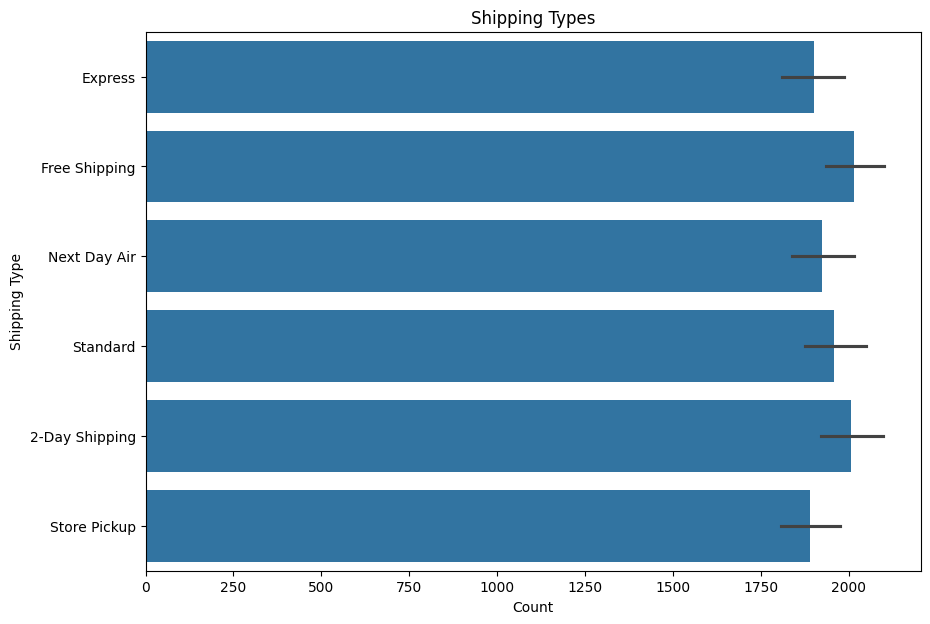

In [83]:
fig, ax = plt.subplots(figsize = (10,7))

sns.barplot(df['Shipping Type'])
plt.title('Shipping Types')
plt.xlabel('Count')
plt.ylabel('Shipping Type')
plt.show()

From the above chart we can see 1-Day and free shipping are the most common 